**Descripción del proyecto**:

Trabajas para la compañía minera OilyGiant. Tu tarea es encontrar el mejor lugar para un nuevo pozo.

Pasos para elegir la ubicación:
- Recolecta los parámetros del pozo de petróleo en la región seleccionada: calidad del petróleo y volumen de reservas;
- Construye un modelo para predecir el volumen de reservas en los nuevos pozos;
- Selecciona los pozos de petróleo con los valores estimados más altos;
- Elige la región con el mayor beneficio total para los pozos de petróleo seleccionados.

Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.



## Descargar y preparar los datos. Explicar el procedimiento.

A continuación veremos si hay valores nulos, duplicados, valores extremos y cómo tratarlos. Además revisaremos los formatos de las columnas.

In [ ]:
# Importamos las librerías

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
# Cargamos los DataFrames

df0 = pd.read_csv("/datasets/geo_data_0.csv")
df1 = pd.read_csv("/datasets/geo_data_1.csv")
df2 = pd.read_csv("/datasets/geo_data_2.csv")

In [ ]:
# Damos un vistazo a los DF
df0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
df1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
df2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Revisaremos sus distribuciones e información general.

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [ ]:
# Revisamos valores ausentes para cada DataFrame

print(df0.isna().sum())
print()
print(df1.isna().sum())
print()
print(df2.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [ ]:
# Revisamos duplicados

print(df0.duplicated().sum())
print(df1.duplicated().sum())
print(df2.duplicated().sum())

0
0
0


### Hallazgos:
- Los 3 DataFrames se componen de 100.000 filas y 5 columnas.
- Los formatos de las columnas son correctos y los formatos de los nombres de las columnas también.
- No hay valores nulos en los DF.
- Tampoco hay valores duplicados.



Ahora estamos listos para entrenar nuestro modelo de regresión!

## Entrena y prueba el modelo para cada región:

Ahora entrenaremos un modelo de regresión lineal para cada región y analizaremos su rendimiento.

### Entrenamos el modelo para **df0**

In [ ]:
# Establecemos el target y los features

target_0 = df0["product"]
features_0 =  df0.drop(columns=["product", "id"])

In [ ]:
# Dividimos los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25

random_state = 200
X_train_0, X_val_0, y_train_0, y_val_0 = train_test_split(features_0,
                                                    target_0,
                                                    test_size=0.25,
                                                    random_state=random_state)

In [ ]:
# Entrenamos el modelo

lr_0 = LinearRegression()
lr_0.fit(X_train_0, y_train_0)

LinearRegression()

In [ ]:
# Hacemos las predicciones para el conjunto de validación

lr_predictions_0 = lr_0.predict(X_val_0)

In [ ]:
# Mostramos en la pantalla el volumen promedio de las reservas previstas y la RECM del modelo

print(f"Volumen promedio de las reservas: {df0['product'].mean()}")
print(f"Linear Regression RMSE: {round(mean_squared_error(y_val_0, lr_predictions_0, squared=False), 4)}")

Volumen promedio de las reservas: 92.50000000000001
Linear Regression RMSE: 37.7213


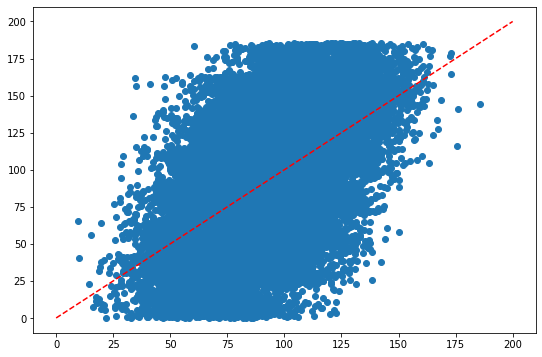

In [ ]:
# Graficamos las predicciones y el rendimiento del modelo

plt.figure(figsize=(9,6))
plt.scatter(x=lr_predictions_0, y = y_val_0)
plt.plot([0, 200], [0, 200], color = "red", ls="--")
plt.show()

- De acuerdo al RMSE nuestro modelo se equivoca en promedio por 38.86 unidades, lo cual es bastante teniendo en cuenta que el valor promedio de las reservas es de 85.44.

- Por otro lado, el gráfico nos muestra una correlación no muy alta, debido a que muchos de los valores están alejados de la recta.

### Entrenamos el modelo para **f1**

In [ ]:
# Establecemos el target y los features

target_1 = df1["product"]
features_1 =  df1.drop(columns=["product", "id"])

In [ ]:
# Dividimos los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25

random_state = 200
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(features_1,
                                                    target_1,
                                                    test_size=0.25,
                                                    random_state=random_state)

In [ ]:
# Entrenamos el modelo

lr_1 = LinearRegression()
lr_1.fit(X_train_1, y_train_1)

LinearRegression()

In [ ]:
# Hacemos las predicciones para el conjunto de validación

lr_predictions_1 = lr_1.predict(X_val_1)

In [ ]:
# Mostramos en la pantalla el volumen promedio de las reservas previstas y la RECM del modelo

print(f"Volumen promedio de las reservas: {df1['product'].mean()}")
print(f"Linear Regression RMSE: {round(mean_squared_error(y_val_1, lr_predictions_1, squared=False), 4)}")

Volumen promedio de las reservas: 68.82500000000002
Linear Regression RMSE: 0.8888


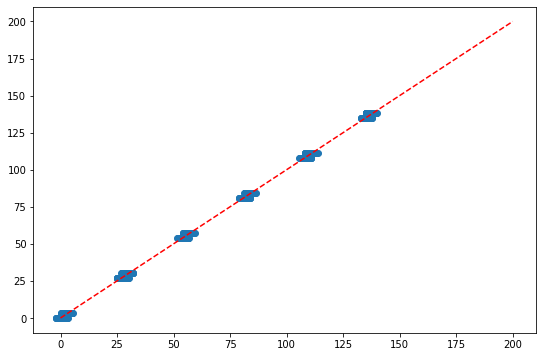

In [ ]:
# Graficamos las predicciones y el rendimiento del modelo

plt.figure(figsize=(9,6))
plt.scatter(x=lr_predictions_1, y = y_val_1)
plt.plot([0, 200], [0, 200], color = "red", ls="--")
plt.show()

- De acuerdo al RMSE nuestro modelo se equivoca en promedio por 0.88 unidades, un valor bastante bajo que, en este caso nos indica un desempeño bastante alto.
- Por otro lado, el gráfico nos muestra una correlación bastante alta, debido a que todos los valores están bastante cerca de la recta.

### Entrenamos el modelo para **f2**

In [ ]:
# Establecemos el target y los features

target_2 = df2["product"]
features_2 =  df2.drop(columns=["product", "id"])

In [ ]:
# Dividimos los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25

random_state = 200
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(features_2,
                                                    target_2,
                                                    test_size=0.25,
                                                    random_state=random_state)

In [ ]:
# Entrenamos el modelo

lr_2 = LinearRegression()
lr_2.fit(X_train_2, y_train_2)

LinearRegression()

In [ ]:
# Hacemos las predicciones para el conjunto de validación

lr_predictions_2 = lr_2.predict(X_val_2)

In [ ]:
# Mostramos en la pantalla el volumen promedio de las reservas previstas y la RECM del modelo

print(f"Volumen promedio de las reservas: {df2['product'].mean()}")
print(f"Linear Regression RMSE: {round(mean_squared_error(y_val_2, lr_predictions_2, squared=False), 4)}")

Volumen promedio de las reservas: 95.00000000000004
Linear Regression RMSE: 40.1276


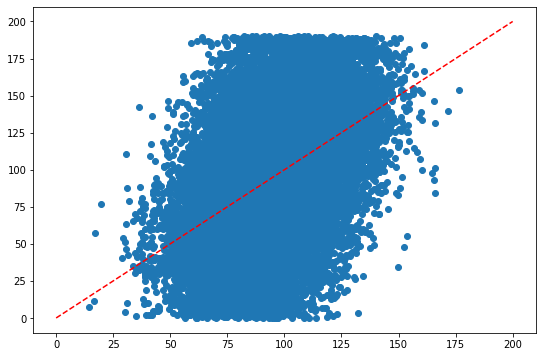

In [ ]:
# Graficamos las predicciones y el rendimiento del modelo

plt.figure(figsize=(9,6))
plt.scatter(x=lr_predictions_2, y = y_val_2)
plt.plot([0, 200], [0, 200], color = "red", ls="--")
plt.show()

- De acuerdo al RMSE nuestro modelo se equivoca en promedio por 40.12 unidades, lo cual es bastante teniendo en cuenta que el valor promedio de las reservas es de 95.00.

- Nuevamente, el gráfico nos muestra una correlación no muy alta, debido a que muchos de los valores están alejados de la recta.

## Prepárate para el cálculo de ganancias

### Almacenar todos los valores clave para los cálculos en variables separadas.

In [ ]:
# Para desarrollar 200 pozos se necesitan 1.000.000 USD
# Un barril = 4.5 USD ingresos
# una unidad de producto = 4.500 USD
# Evaluación de riesgo: mantener solo regiones con probabilidad de pérdida de  menores a 2.5%
# Escoger región con beneficio más alto

df0

In [ ]:
# Utilizamos bootstraping para simular los beneficios

n_iters = 1000
benefits_0 = []

for n in range(n_iters):
    bootstrap_sample_0 = df0.sample(n=500, replace=True)
    top_200_0 = bootstrap_sample_0.sort_values(by="product", ascending = False).reset_index().head(200)

    benefits_0.append((top_200_0["product"] * 4500).sum())

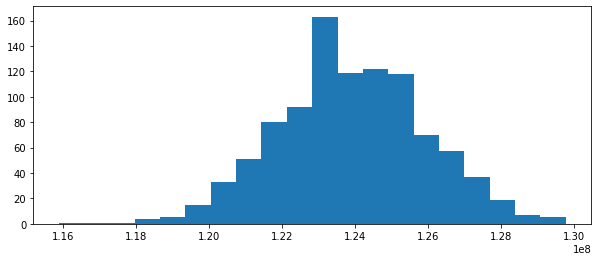

In [ ]:
# Graficamos los beneficios

plt.figure(figsize=(10,4))
plt.hist(x=benefits_0, bins=20)
plt.show()

In [ ]:
# Porcentaje de veces que los beneficios NO superan los costos
(np.array(benefits_0) < 100000000).mean()

0.0

In [ ]:
# Valor a comparar con cada región para escoger la mejor región
np.array(benefits_0).mean()

123896480.79304485

In [ ]:
# Costo promedio por pozo
100000000 / 200

500000.0

In [ ]:
# Número de unidades requeridas por pozo para generar ganancias positivas
500000.0 / 4500

111.11111111111111

In [ ]:
# Promedio de unidades por pozo en la región 0
df0["product"].mean()

92.50000000000001

df1

In [ ]:
# Utilizamos bootstraping para simular los beneficios

n_iters = 1000
benefits_1 = []

for n in range(n_iters):
    bootstrap_sample_1 = df1.sample(n=500, replace=True)
    top_200_1 = bootstrap_sample_1.sort_values(by="product", ascending = False).reset_index().head(200)

    benefits_1.append((top_200_1["product"] * 4500).sum())

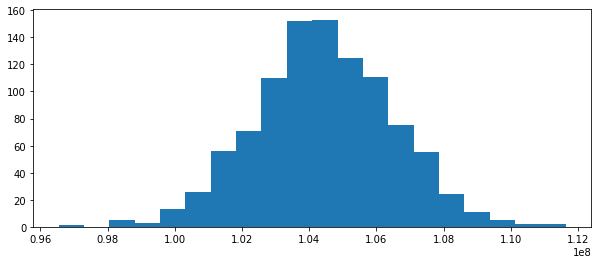

In [ ]:
# Graficamos los beneficios

plt.figure(figsize=(10,4))
plt.hist(x=benefits_1, bins=20)
plt.show()

In [ ]:
# Porcentaje de veces que los beneficios NO superan los costos
(np.array(benefits_1) < 100000000).mean()

0.013

In [ ]:
# Valor a comparar con cada región para escoger la mejor región
np.array(benefits_1).mean()

104442299.3648071

In [ ]:
# Promedio de unidades por pozo en la región 0
df1["product"].mean()

68.82500000000002

df2

In [ ]:
# Utilizamos bootstraping para simular los beneficios

n_iters = 1000
benefits_2 = []

for n in range(n_iters):
    bootstrap_sample_2 = df2.sample(n=500, replace=True)
    top_200_2 = bootstrap_sample_2.sort_values(by="product", ascending = False).reset_index().head(200)

    benefits_2.append((top_200_2["product"] * 4500).sum())

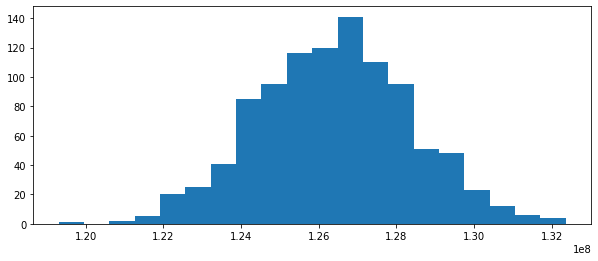

In [ ]:
# Graficamos los beneficios

plt.figure(figsize=(10,4))
plt.hist(x=benefits_2, bins=20)
plt.show()

In [ ]:
# Porcentaje de veces que los beneficios NO superan los costos
(np.array(benefits_2) < 100000000).mean()

0.0

In [ ]:
# Valor a comparar con cada región para escoger la mejor región
np.array(benefits_2).mean()

126402619.9602118

In [ ]:
# Promedio de unidades por pozo en la región 0
df2["product"].mean()

95.00000000000004

- El costo promedio por pozo es de 500.000
- Al calcular las ganancias, solo en la segunda región (df1) el 1.5% de las veces los beneficios no superan los costos. En las otras dos regiones no hubo pérdidas.
- Por otra parte, las regiones con los beneficios promedio más altos son las regiones df0 (123,954,034) y df2 (126,435,483).

## Escribir una función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modela las predicciones:

In [ ]:
# Escribimos la función

def calculate_profit(df, n_iters=1000, sample_size=500, selling_price=4500):
    benefits = []

    for n in range(n_iters):
        bootstrap_sample = df.sample(n=sample_size, replace=True)
        top_200 = bootstrap_sample.sort_values(by="predictions", ascending=False).reset_index().head(200)

        total_profit = (top_200["predictions"] * selling_price).sum()
        benefits.append(total_profit)

    return benefits

### Escoger los pozos con los valores más altos de predicciones.

In [ ]:
# Utilizamos la función sobre las predicciones de nuestro modelo LinearRegression y guardamos los resultados
predictions_df0 = pd.DataFrame({"predictions": lr_predictions_0})
predictions_df1 = pd.DataFrame({"predictions": lr_predictions_1})
predictions_df2 = pd.DataFrame({"predictions": lr_predictions_0})

benefits_df0 = calculate_profit(predictions_df0)
benefits_df1 = calculate_profit(predictions_df1)
benefits_df2 = calculate_profit(predictions_df2)


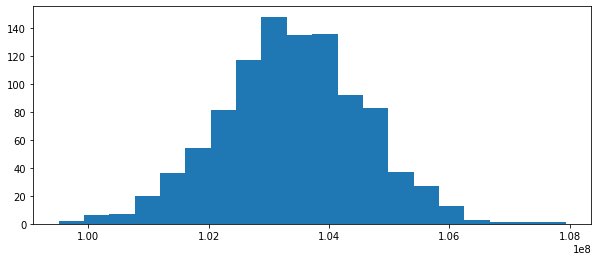

In [ ]:
# Graficamos los beneficios de df0 a partir de las predicciones
plt.figure(figsize=(10,4))
plt.hist(x=benefits_df0, bins=20)
plt.show()

In [ ]:
# Ganancia promedio de df0 a partir de las predicciones
np.array(benefits_df0).mean()

103390765.36733526

In [ ]:
# Porcentaje de veces que los beneficios NO superan los costos en df0
(np.array(benefits_df0) < 100000000).mean()

0.003

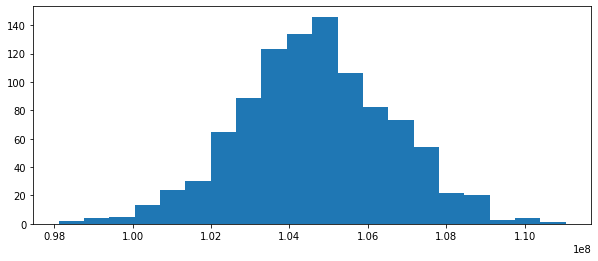

In [ ]:
# Graficamos los beneficios de df1 a partir de las predicciones
plt.figure(figsize=(10,4))
plt.hist(x=benefits_df1, bins=20)
plt.show()

In [ ]:
# Ganancia promedio de df1 a partir de las predicciones
np.array(benefits_df1).mean()

104658968.11168301

In [ ]:
# Porcentaje de veces que los beneficios NO superan los costos en df1
(np.array(benefits_df1) < 100000000).mean()

0.01

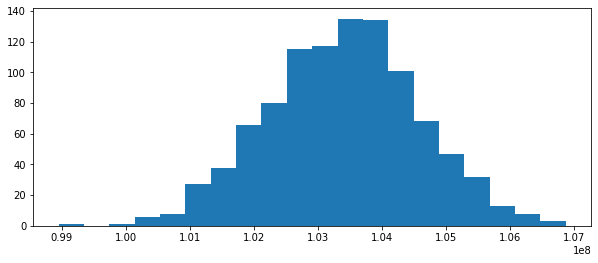

In [ ]:
# Graficamos los beneficios de df2 a partir de las predicciones
plt.figure(figsize=(10,4))
plt.hist(x=benefits_df2, bins=20)
plt.show()

In [ ]:
# Ganancia promedio de df2 a partir de las predicciones
np.array(benefits_df2).mean()

103397030.72014791

In [ ]:
# Porcentaje de veces que los beneficios NO superan los costos
(np.array(benefits_df2) < 100000000).mean()

0.001

- En este caso en todas las regiones el porcentaje de veces en las que los beneficios no superan los $100,000,000 es menor a 2.5%.
- La región df1 fue la que presentó el mayor porcentaje de pérdida (1.3%).
- De acuerdo a las predicciones, la región df1 es la que presenta un promedio de ganancia más alto con un valor de 104.489.652. Sin embargo, no es un valor muy alejado al que presentan las predicciones de las otras dos regiones.

### Resumir el volumen objetivo de reservas de acuerdo con estas predicciones

In [ ]:
# Resumen objetivo df0
predictions_df0.sort_values("predictions", ascending=False).head(200)

,predictions
12345,185.531997
9809,175.994362
12309,175.399113
8921,172.961672
609,172.941723
...,...
10199,147.579719
2657,147.565992
5283,147.543117
5861,147.530884


In [ ]:
# Resumen objetivo df1
predictions_df1.sort_values("predictions", ascending=False).head(200)

,predictions
20799,139.906268
13026,139.679255
7003,139.477529
19610,139.476751
17112,139.427533
...,...
23889,138.427194
5845,138.425966
1817,138.425038
20614,138.419094


In [ ]:
# Resumen objetivo df2
predictions_df2.sort_values("predictions", ascending=False).head(200)

,predictions
12345,185.531997
9809,175.994362
12309,175.399113
8921,172.961672
609,172.941723
...,...
10199,147.579719
2657,147.565992
5283,147.543117
5861,147.530884


### Proporciona los hallazgos: sugiere una región para el desarrollo de pozos petroleros y justifica la elección. Calcula el beneficio por el volumen de reservas obtenido.

Al realizar los cálculos, pudimos ver que las regiones df0 y df2 son las que tienen menor porcentaje de pérdida. Entre estas dos, la región df2 tiene una mayor ganancia promedio, pero por muy poco. Por otro lado, al observar el histograma, df1 tiene una varianza más centrada, por lo que la sugeriremos como la región para desarrollar los pozos.

## Calcula riesgos y ganancias para cada región:

###  Usa la técnica bootstrapping con 1000 muestras para encontrar la distribución del beneficio.


In [ ]:
# Nuevamente utilizamos nuestra función basada en bootstrapping para calcular las ganancias de cada región

def calculate_profit(df, n_iters=1000, sample_size=500, selling_price=4500):
    benefits = []

    for n in range(n_iters):
        bootstrap_sample = df.sample(n=sample_size, replace=True)
        top_200 = bootstrap_sample.sort_values(by="predictions", ascending=False).reset_index().head(200)

        total_profit = (top_200["predictions"] * selling_price).sum()
        benefits.append(total_profit)

    return benefits

In [ ]:
# guardamos los beneficios para cada región

benefits_df0 = calculate_profit(predictions_df0)
benefits_df1 = calculate_profit(predictions_df1)
benefits_df2 = calculate_profit(predictions_df2)


### Encuentra el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala como una probabilidad y luego exprésala como un porcentaje.


In [ ]:
# Beneficio promedio
mean_df0 = np.mean(benefits_df0)
mean_df1 = np.mean(benefits_df1)
mean_df2 = np.mean(benefits_df2)

print(f"Beneficio promedio df0: {int(mean_df0)}")
print(f"Beneficio promedio df1: {int(mean_df1)}")
print(f"Beneficio promedio df2: {int(mean_df2)}")

Beneficio promedio df0: 103446537
Beneficio promedio df1: 104469547
Beneficio promedio df2: 103422244


In [ ]:
# Calcular el intervalo de confianza del 95%

confidence_level = 0.95

confidence_interval_df0 = stats.t.interval(confidence_level, len(benefits_df0) - 1, loc=np.mean(benefits_df0), scale=stats.sem(benefits_df0))
confidence_interval_df1 = stats.t.interval(confidence_level, len(benefits_df1) - 1, loc=np.mean(benefits_df1), scale=stats.sem(benefits_df1))
confidence_interval_df2 = stats.t.interval(confidence_level, len(benefits_df2) - 1, loc=np.mean(benefits_df2), scale=stats.sem(benefits_df2))

print("Intervalo de confianza del 95% para df0:", confidence_interval_df0)
print("Intervalo de confianza del 95% para df1:", confidence_interval_df1)
print("Intervalo de confianza del 95% para df2:", confidence_interval_df2)


Intervalo de confianza del 95% para df0: (103375803.287902, 103517272.48888958)
Intervalo de confianza del 95% para df1: (104346557.91268812, 104592536.87238471)
Intervalo de confianza del 95% para df2: (103350211.57168294, 103494278.41041581)


In [ ]:
# Calculamos el porcentaje de ganancias negativas

neg_df0 = (np.array(benefits_df0) < 100000000).mean()
neg_df1 = (np.array(benefits_df1) < 100000000).mean()
neg_df2 = (np.array(benefits_df2) < 100000000).mean()

print(f"Porcentaje de ganancias negativas de df0: {neg_df0}")
print(f"Porcentaje de ganancias negativas de df1: {neg_df1}")
print(f"Porcentaje de ganancias negativas de df2: {neg_df2}")

Porcentaje de ganancias negativas de df0: 0.002
Porcentaje de ganancias negativas de df1: 0.016
Porcentaje de ganancias negativas de df2: 0.003


### Proporciona los hallazgos: sugiere una región para el desarrollo de pozos petroleros y justifica la elección.

- Al observar los intervalos de confianza no vemos diferencias significativas entre las regiones.
- Como mencionamos anterior mente, pudimos ver que las regiones df0 y df2 son las que tienen menor porcentaje de pérdida. Entre estas dos, la región df2 tiene una mayor ganancia promedio, pero por muy poco. Por otro lado, al observar el histograma, df1 tiene una varianza más centrada, por lo que la sugeriremos como la región para desarrollar los pozos.

## Conclusión:

- 1 Al estudiar la tabla:
 - Los 3 DataFrames se componen de 100.000 filas y 5 columnas.
 - Los formatos de las columnas son correctos y los formatos de los nombres de las columnas también.
 - No hay valores nulos en los DF.
 - Tampoco hay valores duplicados.
- 2 Al entrenar nuestro modelo con LR:
 - df0:
  - De acuerdo al RMSE nuestro modelo se equivoca en promedio por 38.86 unidades, lo cual es bastante teniendo en cuenta que el valor promedio de las reservas es de 85.44.

  - Por otro lado, el gráfico nos muestra una correlación no muy alta, debido a que muchos de los valores están alejados de la recta.
 - df1:
  - De acuerdo al RMSE nuestro modelo se equivoca en promedio por 0.88 unidades, un valor bastante bajo que, en este caso nos indica un desempeño bastante alto.
  - Por otro lado, el gráfico nos muestra una correlación bastante alta, debido a que todos los valores están bastante cerca de la recta.
 - df2:
 - De acuerdo al RMSE nuestro modelo se equivoca en promedio por 0.88 unidades, un valor bastante bajo que, en este caso nos indica un desempeño bastante alto.
 - Por otro lado, el gráfico nos muestra una correlación bastante alta, debido a que todos los valores están bastante cerca de la recta.
- 3 Al calcular las ganancias.
 - El costo promedio por pozo es de 500.000
 - Al calcular las ganancias, solo en la segunda región (df1) el 1.5% de las veces los beneficios no superan los costos. En las otras dos regiones no hubo pérdidas.
 - Por otra parte, las regiones con los beneficios promedio más altos son las regiones df0 (123,954,034) y df2 (126,435,483).
- 4 Al calcular riesgos y ganancias con bootstrapping y por medio de las predicciones:
 - Al observar los intervalos de confianza no vemos diferencias significativas entre las regiones.
 - Como mencionamos anterior mente, pudimos ver que las regiones df0 y df2 son las que tienen menor porcentaje de pérdida. Entre estas dos, la región df2 tiene una mayor ganancia promedio, pero por muy poco. Por otro lado, al observar el histograma, df1 tiene una varianza más centrada, por lo que la sugeriremos como la región para desarrollar los pozos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

# Comentario General

¡Buen trabajo! Te felicito, definitivamente has realizado un proyecto excelente.
</div>